In [1]:
"""Analysis of the greedy results"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "optimal_greedy_test_basic_j12_s2_0",
  # "optimal_greedy_test_basic_j15_s2_0",
    "optimal_greedy_test_basic_j15_s3_0",
    "optimal_greedy_test_basic_j25_s5_0",
    "optimal_greedy_test_basic_j50_s5_0"
]

big_small = [
    "optimal_greedy_test_big_small_j12_s2_0",
  # "optimal_greedy_test_big_small_j15_s2_0",
    "optimal_greedy_test_big_small_j15_s3_0",
    "optimal_greedy_test_big_small_j25_s5_0",
    "optimal_greedy_test_big_small_j50_s7_0",
    "optimal_greedy_test_big_small_j75_s8_0",
    "optimal_greedy_test_big_small_j100_s10_0"
]
all_policies = [
    '../all_greedy_test_Fog_j12_s3_0'
]
paper = [
  # "flexible_greedy_fog_j15_s3_0",
  # "flexible_greedy_fog_j20_s4_0",
  # "flexible_greedy_fog_j30_s5_0",
    
  # "flexible_greedy_fog_j12_s4_0",
  # "flexible_greedy_fog_j16_s5_0",
  # "flexible_greedy_fog_j20_s6_0",
  # "flexible_greedy_fog_j32_s8_0",
  # "flexible_greedy_fog_j40_s10_0"
    
    "paper_fog_v2_j4_s1_0",
    "paper_fog_v2_j8_s2_1",
    "paper_fog_v2_j12_s3_0",
    "paper_fog_v2_j12_s3_1",
    "paper_fog_v2_j4_s1_1",
    "paper_fog_v2_j8_s2_2",
    "paper_fog_v2_j12_s3_2",
    "paper_fog_v2_j16_s4_0"
]

In [5]:
encoded_filenames = paper
folder = "paper"
x_axis = 'Social Welfare'
title = "{} of {} model".format("Social Welfare", 'Basic')

In [6]:
data = []
model_names: List[str] = []
test_name: str = ''

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        json_data = json.load(file)
        
        for pos, results in enumerate(json_data):
            # Find the best results of sum value or percentage jobs from all of the algorithms
            best_sum_value = results['optimal']['sum value']
            best_percentage_jobs = results['optimal']['percentage jobs']
            
            for algo_name, algo_results in results.items():
                if type(algo_results) is dict:  # Otherwise optimal or relaxed == 'failure'
                    data.append((pos, model_name, algo_name, algo_results['sum value'],
                                 algo_results['percentage jobs'], algo_results['solve_time'],
                                 algo_results['sum value'] / best_sum_value,
                                 algo_results['percentage jobs'] / best_percentage_jobs))

df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Social Welfare', 'Percentage Jobs',
                                 'Solve Time', 'Best Social Welfare', 'Best Percentage Jobs'])

In [7]:
df.sort_values(by=['Social Welfare'])[['Algorithm Name', 'Social Welfare']].tail(50)

,Algorithm Name,Social Welfare
334,dia 5,529
335,dia 10,529
329,relaxed,529
332,dia 2,529
331,dia 1,529
333,dia 3,529
175,dia 10,530
174,dia 5,530
168,optimal,530
169,relaxed,530


In [8]:
df = df.loc[~((df['Algorithm Name'].str.contains('Greedy Utility * deadline / Sum', regex=False)) |
              (df['Algorithm Name'].str.contains('Greedy Utility / Sqrt Sum', regex=False)) |
              (df['Algorithm Name'].str.contains('Matrix Greedy Sum Exp^3 Percentage', regex=False)))]
df['Algorithm Name'].unique()

array(['optimal', 'relaxed', 'fixed', 'dia 1', 'dia 2', 'dia 3', 'dia 5',
       'dia 10'], dtype=object)

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


IndexError: index 4 is out of bounds for axis 1 with size 4

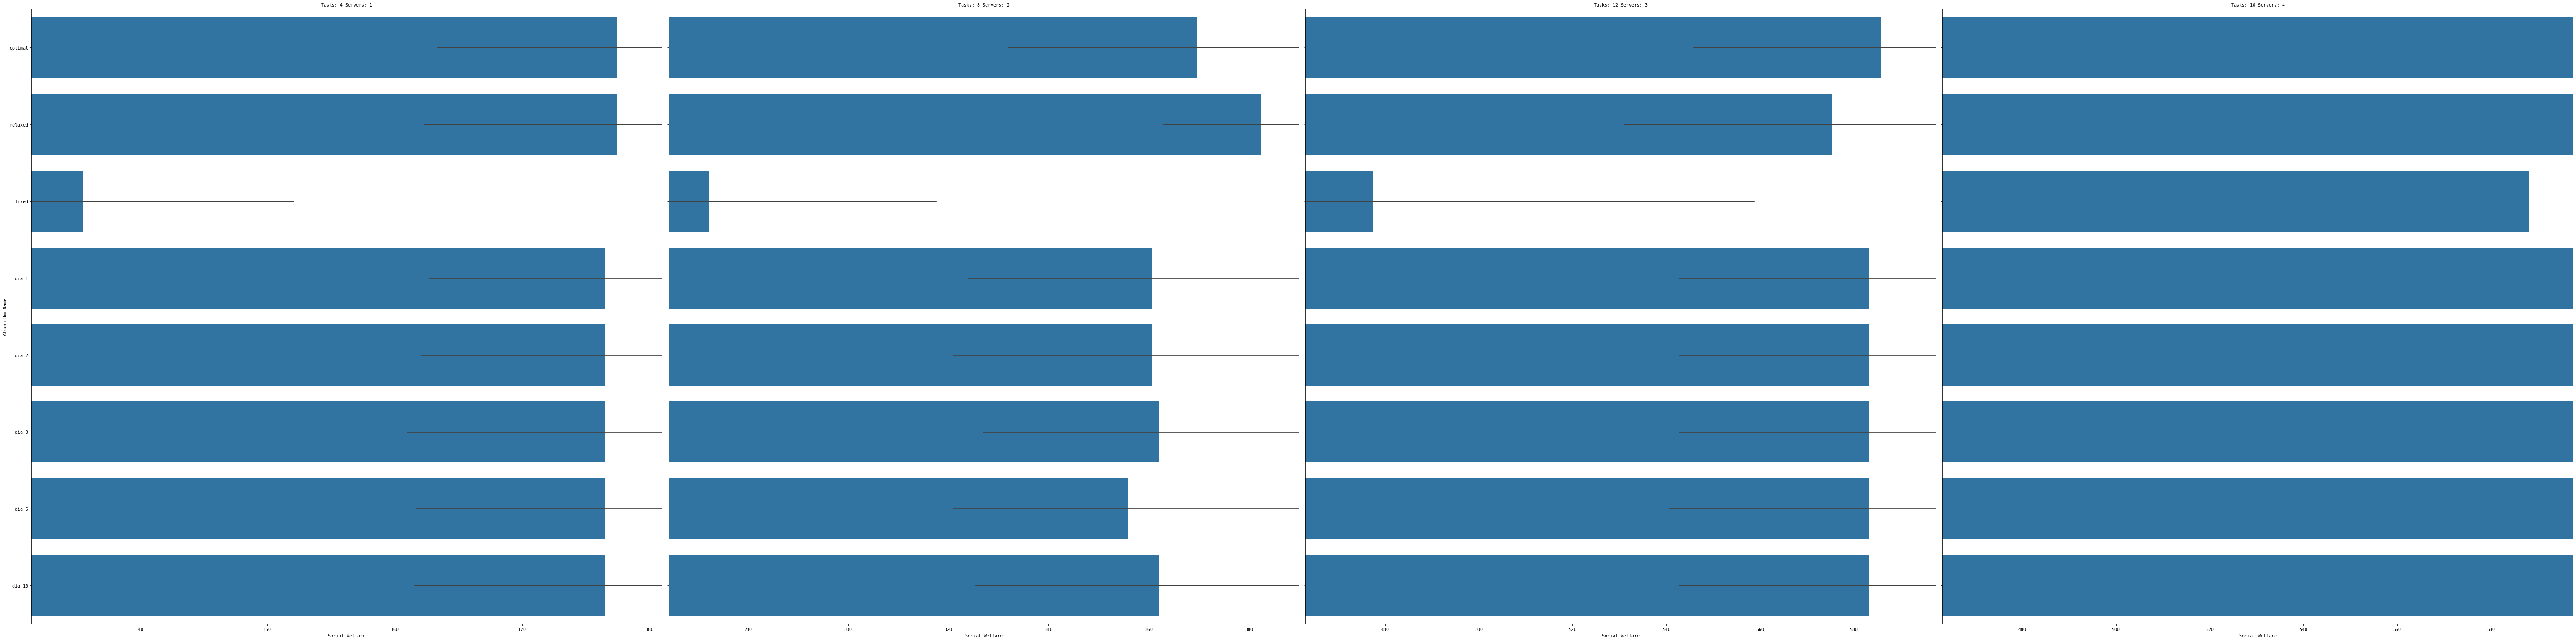

In [9]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=20)
g = g.map(sns.barplot, x_axis, 'Algorithm Name').set_titles("{col_name}")

for pos, model in enumerate(model_names):
    values = [np.mean(df[(df['Model Name'] == model) & (df['Algorithm Name'] == algo)][x_axis])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.97, max(values) * 1.02)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g    

In [ ]:
df['Algorithm Name'].unique()

In [10]:
short_df = df[(df['Algorithm Name'] == 'optimal') | 
              (df['Algorithm Name'] == 'relaxed') | 
              (df['Algorithm Name'] == 'fixed') ]
short_df

,Pos,Model Name,Algorithm Name,Social Welfare,Percentage Jobs,Solve Time,Best Social Welfare,Best Percentage Jobs
0,0,Tasks: 4 Servers: 1,optimal,268,0.750,0.154,1.000000,1.000000
1,0,Tasks: 4 Servers: 1,relaxed,268,0.750,0.156,1.000000,1.000000
2,0,Tasks: 4 Servers: 1,fixed,268,0.750,0.000,1.000000,1.000000
8,1,Tasks: 4 Servers: 1,optimal,200,0.750,0.251,1.000000,1.000000
9,1,Tasks: 4 Servers: 1,relaxed,200,0.750,0.247,1.000000,1.000000
...,...,...,...,...,...,...,...,...
337,1,Tasks: 12 Servers: 3,relaxed,693,1.000,5.152,1.000000,1.000000
338,1,Tasks: 12 Servers: 3,fixed,671,0.917,7.300,0.968254,0.917000
344,0,Tasks: 16 Servers: 4,optimal,688,0.812,180.040,1.000000,1.000000
345,0,Tasks: 16 Servers: 4,relaxed,717,0.875,60.045,1.042151,1.077586


Save file location: ../figures/greedy/png/all_shortened.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/greedy/eps/all_shortened.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


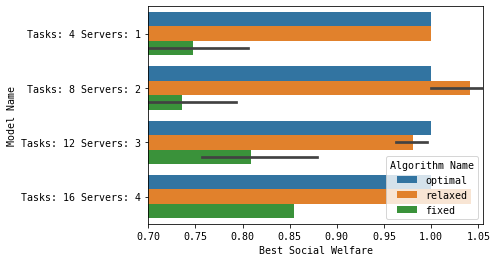

In [11]:
g = sns.barplot(y='Model Name', x='Best Social Welfare', hue='Algorithm Name', data=short_df)
g.set_xlim(0.7, 1.055)
save_plot(analysis_filename('all', 'shortened'), "greedy", image_formats=[ImageFormat.PNG, ImageFormat.EPS])
